In [1]:
import numpy as np
from keras import models, layers
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [5]:
train_data.shape

(60000, 28, 28)

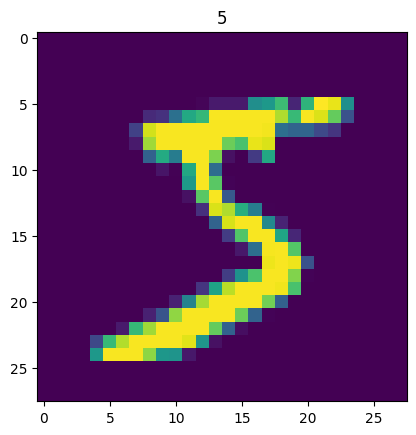

In [10]:
plt.imshow(train_data[0])
plt.title(train_labels[0])
plt.show()

In [11]:
train_labels[0]

5

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_data.shape

(60000, 28, 28)

In [17]:
x_train = train_data.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [19]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 11s 14ms/step - loss: 0.2658 - accuracy: 0.9240
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1089 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0722 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0521 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0387 - accuracy: 0.9886


In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0632 - accuracy: 0.9810


[0.06322787702083588, 0.9810000061988831]

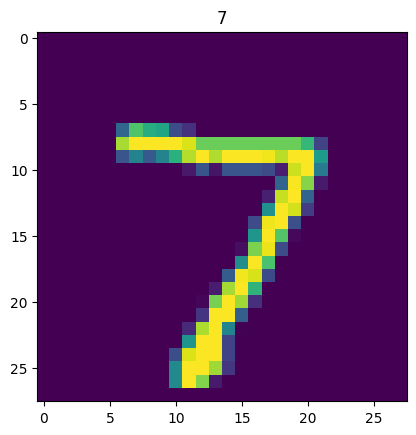

In [27]:
plt.imshow(test_data[0])
plt.title(test_labels[0])
plt.show()

In [28]:
prediction = model.predict(x_test[0].reshape(1, 28 * 28))
prediction

1/1 [==============================] - 0s 113ms/step


array([[2.2427445e-08, 1.6784369e-09, 2.1347769e-06, 8.6737273e-06,
        2.0866564e-11, 1.8943636e-08, 6.4134971e-13, 9.9998808e-01,
        5.2850794e-08, 9.8146313e-07]], dtype=float32)

In [29]:
np.argmax(prediction)

7